# CLASE 4.1: PRIMEROS PASOS EN SCIPY
---

## Introducción.
La última sección de esta asignatura nos llevará por un viaje a una de las librerías más interesantes en Python, tanto para la ingeniería como para la ciencia en todas sus diversas ramificaciones. **Scipy** es el acrónimo de *Scientific Python*, y como su nombre lo indica, corresponde a la librería científica de Python. **Scipy** es una librería construida sobre **Numpy** que añade opciones de gran complejidad a nuestra caja de herramientas de análisis de datos en varios campos interesantes, tales como estadística, análisis de Fourier, optimización, interpolación, cálculo numérico, procesamiento de imágenes, entre otras poderosas herramientas, lo que transforma a **Scipy** en una librería al nivel de otros frameworks tales como Matlab, R-Lab u Octave.

En general, **Scipy** trabaja sobre la base varios módulos que cubren diferentes necesidades que podamos tener en relación al análisis y procesamiento de información referente a un determinado problema. Los módulos que abordaremos en nuestra asignatura, a nivel esencialmente introductorio, son los que se listan en la Tabla (1.1).

</p> <p style="text-align: center;">Tabla (1.1): Módulos que trabajaremos en nuestra asignatura</p>

| Módulo        | Descripción                                                           |
| :------------ | :-------------------------------------------------------------------- |
| `stats`       | Especializado en el análisis estadístico sobre variables aleatorias.  |
| `linalg`      | Especializado en funciones relativas al álgebra lineal                |
| `interpolate` | Especializado en métodos de interpolación                             |
| `integrate`   | Especializado en cálculo de integrales conforme varios métodos        |
| `optimize`    | Especializado en la optimización de funciones conforme varios métodos |

Dada esta estructura, es común que importemos cada módulo a utilizar. Éstos no suelen tener un alias universalmente utilizado, así que los usaremos tal cual.

Partiremos importando nuestras librerías previamente aprendidas, y seteando algunos parámetros para este notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from IPython.core.display import HTML

In [3]:
# Setting de parámetros de graficación.
sns.set()
plt.rcParams["figure.dpi"] = 150 # Resolución de nuestras figuras.
plt.style.use("bmh") # Template de estilo.

In [4]:
# Centramos el output de los gráficos en este notebook.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## El módulo `scipy.stats`.
En esta primera aproximación, aprenderemos algunos de los atributos del módulo `scipy.stats`, el cual nos permite la realización de poderosos análisis de naturaleza estadística. Nuestro objetivo es aprender a trabajar con distribuciones de probabilidad discretas y continuas, además de muestreos aleatorios, e incluso nos daremos el tiempo de comentar algunos aspectos relativos a pruebas de hipótesis y análisis de varianza.

### Variables aleatorias y distribuciones.
La **probabilidad**, en términos bien generales, se corresponde con el estudio de la incertidumbre. La probabilidad puede ser pensada como la fracción de tiempo en el cual un evento determinado ocurre, o como el grado de creencia bajo el cual un evento puede ocurrir. Queremos usar la probabilidad como medida de la posibilidad en que un suceso ocurre en un experimento determinado. Esta idea es esencial en campos como el aprendizaje automático (o *Machine Learning*), puesto que con frecuencia queremos entender cuánto nivel de incertidumbre hay en nuestra data o en la predicción realizada por un modelo. La cuantificación de la incertidumbre requiere de objetos matemáticos especializados conocidos como **variables aleatorias**, las cuales corresponden a funciones que mapean los resultados de experimentos aleatorios sobre los conjuntos de propiedades que nos interesan. Hay funciones asociadas a las variables aleatorias que permiten medir la probabilidad de que un resultado particular (o un conjunto de resultados) ocurra(n). Tales funciones se conocen como **distribuciones de probabilidad**, y son utilizadas como cimientos para la construcción de otros conceptos más complejos, tales como modelos probabilísticos, modelos gráficos y selección de modelos.

En la teoría de probabilidad, el conjunto de todos los posibles resultados de un proceso de naturaleza aleatoria se conoce como **espacio muestral**. A cada uno de los elementos de este espacio, que solemos denotar como $\Omega$, podemos asignarle una probabilidad de ocurrencia (por ejemplo, conforme el muestreo de los elementos de $\Omega$). El conjunto de todas estas probabilidades define a la distribución de probabilidad inherente a todos estos elementos. Una **variable aleatoria** corresponde a una función que mapea los elementos de $\Omega$ sobre el conjunto $\mathbb{R}$. Por ejemplo, los resultados posibles en el lanzamiento de un dado típico se agrupan en el conjunto $\Omega =\left\{1,2,3,4,5,6\right\}$. Por lo tanto, una variable aleatoria que describe las probabilidades de ocurrencia de cada resultado del lanzamiento de este dado puede escribirse simbólicamente como $X:\Omega \longrightarrow \mathbb{R}$. Así pues, una variable aleatoria no es más que una función (real o discreta) definida en un conjunto determinado. La palabra “aleatoria” tan solo se utiliza para recordar que el conjunto en cuestión es un espacio muestral $\Omega$ (en ningún caso significa, necesariamente, que los elementos de $\Omega$ se escojan al azar para construir la variable aleatoria respectiva).

A causa de la generalidad de la anterior definición, es posible tener distintas variables aleatorias asociadas a un mismo experimento. En cada caso particular nosotros, como experimentadores (o, a un grado ya más subjetivo, generalistas o conocedores del negocio), debemos decidir cuáles son las variables aleatorias que nos interesan. Generalmente, procuramos trabajar con las variables aleatorias cuyas funciones reflejan, con la máxima simplicidad posible, las propiedades de los resultados del experimento que son realmente esenciales. Esto no es trivial y, con frecuencia, se va haciendo más fácil con la experiencia.

El módulo `scipy.stats` nos provee de clases para representar variables aleatorias con un gran número de distribuciones de probabilidad. Disponemos fundamentalmente de dos clases que permiten la representación de variables aleatorias discretas (definidas sobre espacios muestrales finitos o infinitos numerables) y continuas (definidas sobre espacios muestrales infinitos no numerables): `rv_discrete` y `rv_continuous`, pero que no se usan de manera directa, sino que como clases padre que heredan sus atributos y métodos base sobre objetos más específicos que representan variables aleatorias con alguna distribución de probabilidad subyacente particular. En la Tabla (1.2) se resumen algunos de los métodos típicos para los objetos de **Scipy** que representan variables aleatorias.

</p> <p style="text-align: center;">Tabla (1.2): Algunos métodos aplicables sobre objetos que representan variables aleatorias en Scipy</p>

| Métodos           | Descripción                                                                        |
| :---------------- | :--------------------------------------------------------------------------------- |
| `pdf` o `pmf`     | Permite calcular la función de densidad de probabilidad $f(x)$ (caso continuo) o de masa de probabilidad $p(x)$ (caso discreto). |
| `cdf`             | Permite calcular la función de distribución de probabilidad acumulada $F(x)$.      |
| `sf`              | Permite calcular la función de supervivencia $S(x)=1-F(x)$.                        |
| `ppf`             | Permite calcular la función de cuantía $Q(x) = F^{-1}(x)$.                         |
| `moment`          | Permite calcular momentos estadísticos no centrados de orden $n$.                  |
| `stats`           | Permite calcular los estadígrafos típicos asociados a la distribución correspondiente. En general, media, varianza, entre otros |
| `fit`             | Permite ajustar una distribución a una muestra de datos por medio de un método de optimización de máxima verosimilutud (válido únicamente para distribuciones continuas). |
| `expect`          | Permite calcular el valor esperado de una función con respecto a una distribución. |
| `interval`        | Permite calcular intervalos de confianza.                                          |
| `rvs`             | Permite obtener muestreos de variables aleatorias.                                 | 
| `mean` y `median` | Permite calcular media y mediana de la distribución.                               |
| `std` y `var`     | Permite calcular desviación estándar y varianza de la distribución.                |

Consideremos pues un caso de uso para ejemplificar la construcción  de variables aleatorias en `scipy.stats`. Crearemos una variable aleatoria con distribución normal, con media 2 y desviación estándar igual a 1:

In [5]:
from scipy import stats

In [6]:
# X es una variable aleatoria normal, con media 1 y desviación estándar igual a 0.5.
X = stats.norm(loc=2, scale=1)

La función de densidad de probabilidad subyacente a una variable aleatoria creada por medio de la clase `stats.norm()` es

$$f\left( x\right)  =\displaystyle \frac{1}{\sqrt{2\pi } \sigma } \exp -\frac{1}{2} \left( \frac{x-\mu }{\sigma } \right)^{2}$$
</p> <p style="text-align: right;">$(1.1)$</p>

para $x\in \mathbb{R}$. La variable `X` es un objeto que representa, por tanto, una variable aleatoria normal con $\mu=2$ y $\sigma=1$. Por ejemplo, usando la información presentada en la Tabla (1.2), podemos calcular algunos estadígrafos asociados a `X` como sigue:

In [7]:
# Estadígrafos de esta distribución.
print(f"Media: {X.mean()}")
print(f"Mediana: {X.median()}")
print(f"Desviación estándar: {X.std()}")
print(f"Varianza: {X.var()}")

Media: 2.0
Mediana: 2.0
Desviación estándar: 1.0
Varianza: 1.0


Podemos, igualmente, calcular los momentos no centrales de orden $n$ para nuestra variable aleatoria `X` usando el método `moment()`:

In [8]:
# Primeros 7 momentos de la variable aletoria X.
moments = [X.moment(n) for n in range(1, 8)]

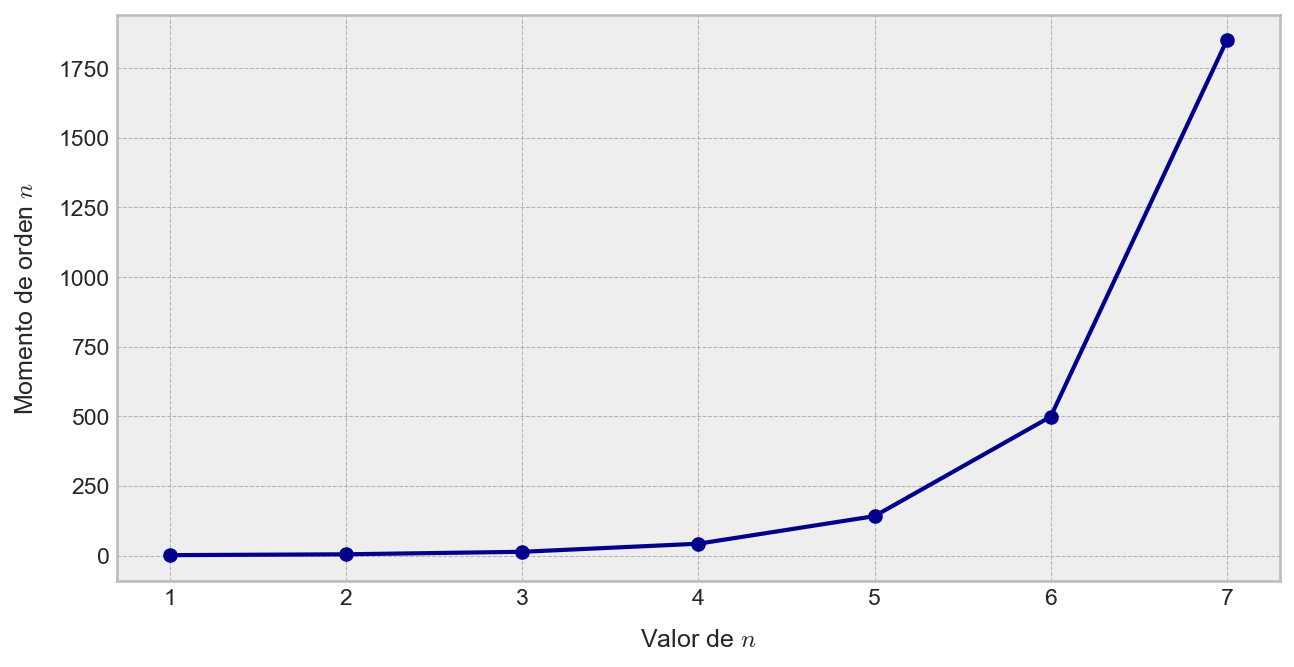

In [9]:
# Graficamos estos momentos.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(1, 8), moments, marker="o", linestyle="-", color="darkblue")
ax.set_xlabel(r"Valor de $n$", fontsize=12, labelpad=10)
ax.set_ylabel(r"Momento de orden $n$", fontsize=12, labelpad=10);

A partir de nuestro objeto `X`, podemos generar un muestreo de varias funciones asociadas a la misma. Por ejemplo, podemos usar el método `pdf()` para obtener una muestra de la función de densidad inherente a `X`, considerando sus parámetros de localización (media) y escala (desviación estándar). Lo único que necesitamos es un arreglo que liste los valores para los cuales queremos el valor de dicha función de densidad:

In [10]:
# Obtenemos los valores de la función de densidad subyacente a X en el intervalo [-6, 6].
x = np.linspace(start=-6, stop=6, num=100)
X_pdf = X.pdf(x)

In [11]:
# Muestreamos tambien usando el generador de números aleatorios de Numpy.
rng = np.random.default_rng(seed=42)
X_samp = rng.normal(loc=2, scale=1, size=1000)

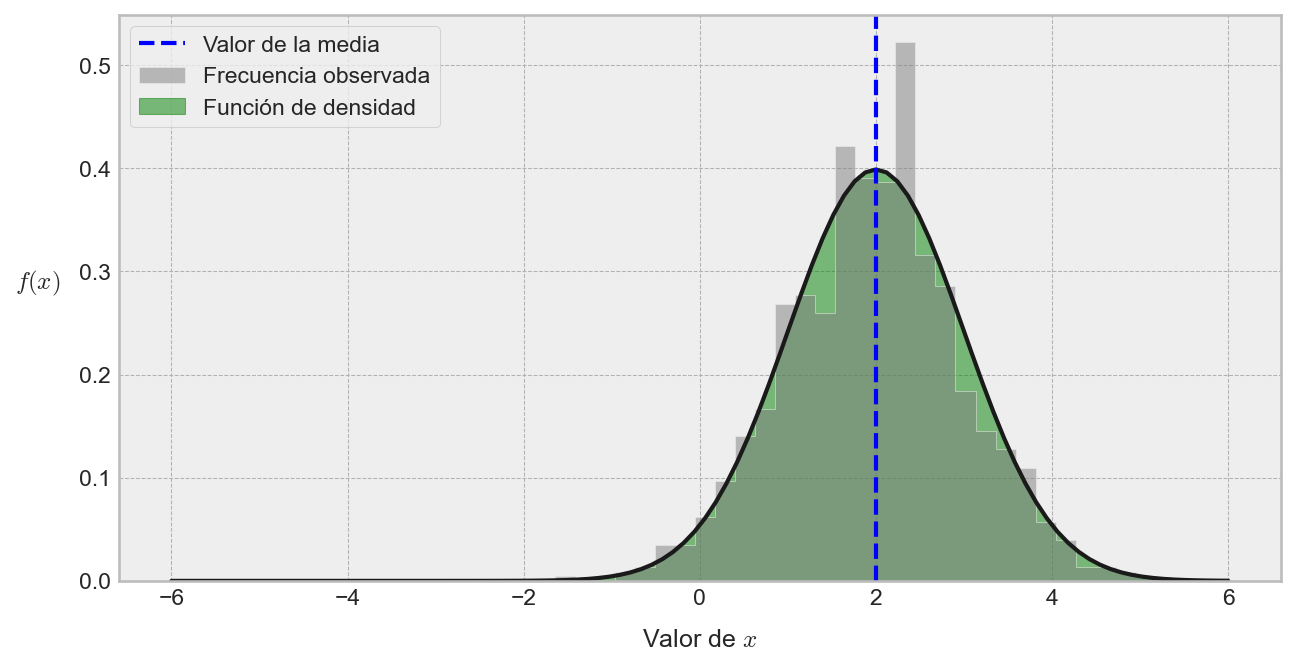

In [12]:
# Graficamos esta función de densidad y el histograma de las muestras.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, X_pdf, color="k", linestyle="-")
ax.hist(
    x=X_samp, bins=30, color="gray", histtype="stepfilled", alpha=0.5, 
    density=True, label="Frecuencia observada"
)
ax.fill_between(x=x, y1=X_pdf, color="green", alpha=0.5, label="Función de densidad")
ax.axvline(x=X.mean(), color="blue", linestyle="--", label="Valor de la media")
ax.set_xlabel(r"Valor de $x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$f(x)$", fontsize=12, labelpad=20, rotation=0)
ax.legend(loc="upper left", frameon=True);

Podemos, igualmente, obtener la función de distribución acumulada inherente a nuestra variable aleatoria `X` simplemente usando el método `cdf()`. En este caso, podemos usar el mismo arreglo de valores anterior y que usamos para la graficación de la correspondiente función de densidad:

In [13]:
# Obtenemos los valores de la función de distribución subyacente a X en el intervalo [-3, 3].
X_cdf = X.cdf(x)

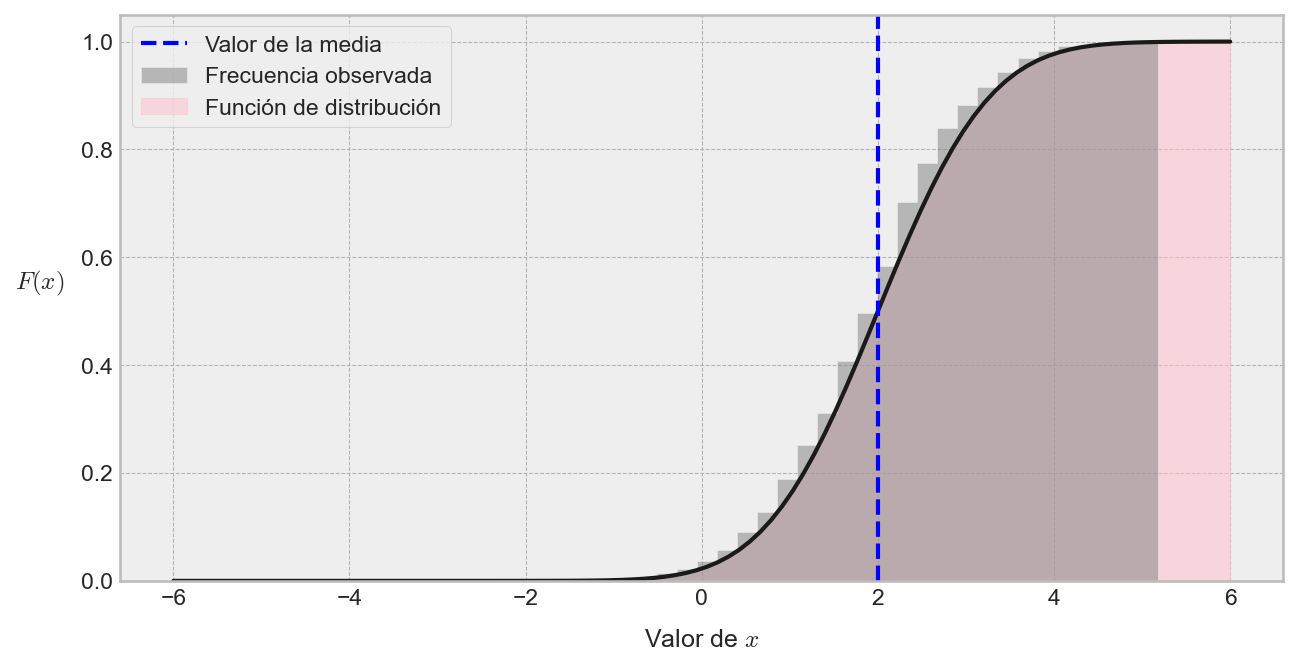

In [14]:
# Construimos el gráfico de esta función de distribución y lo comparamos con las muestras correspondientes.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, X_cdf, color="k", linestyle="-")
ax.hist(
    x=X_samp, bins=30, color="gray", histtype="stepfilled", alpha=0.5, 
    density=True, cumulative=True, label="Frecuencia observada"
)
ax.fill_between(x=x, y1=X_cdf, color="pink", alpha=0.5, label="Función de distribución")
ax.axvline(x=X.mean(), color="blue", linestyle="--", label="Valor de la media")
ax.set_xlabel(r"Valor de $x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$F(x)$", fontsize=12, labelpad=20, rotation=0)
ax.legend(loc="upper left", frameon=True);

Podemos igualmente estimar los intervalos de confianza asociados a una función de densidad inherente a una variable aleatoria mediante el método `interval()`. De esta manera, podemos determinar la región interior a una función de densidad en la cual la probabilidad de obtener un determinado resultado de la variable aleatoria tiene un valor dado. Por ejemplo, en el caso de nuestra variable aleatoria normal `X`, el intervalo de confianza que captura el 95% de los valores en el correspondiente espacio muestral se calcula como sigue:

In [15]:
# Intervalo de 95% de confianza para X.
min_95, max_95 = X.interval(0.95)

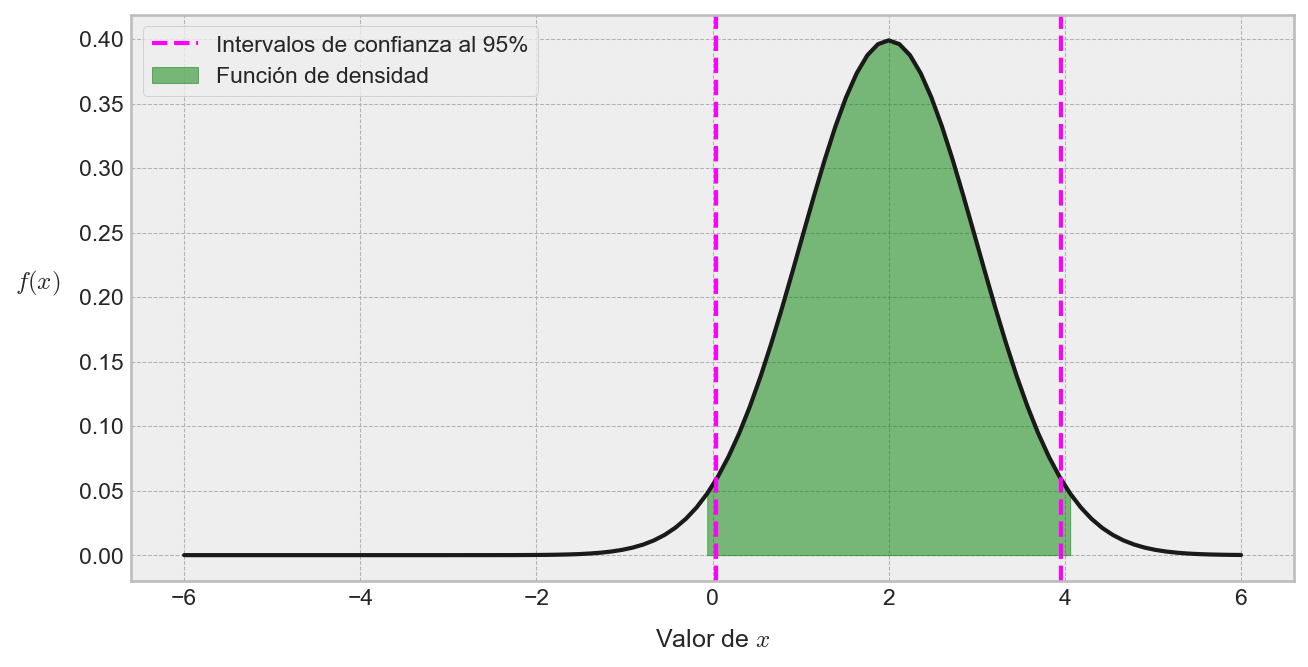

In [16]:
# Graficamos esta función de densidad con su intervalo de confianza al 95%.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, X_pdf, color="k", linestyle="-")
ax.fill_between(
    x=x, y1=X_pdf, where=(X_pdf >= min_95) & (X_pdf <= max_95), 
    color="green", alpha=0.5, label="Función de densidad"
)
ax.axvline(x=min_95, color="magenta", linestyle="--", label="Intervalos de confianza al 95%")
ax.axvline(x=max_95, color="magenta", linestyle="--")
ax.set_xlabel(r"Valor de $x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$f(x)$", fontsize=12, labelpad=20, rotation=0)
ax.legend(loc="upper left", frameon=True);

Los ejemplos anteriores incluyen todos un recurso gráfico que nos permite construir una primera intuición en relación tanto a los objetos que hemos construido usando el módulo `scipy.stats`. Siempre es buena idea tener a mano un recurso como éste al instanciar objetos que representen variables aleatorias en una primera instancia, ya que nos permite entender el significado de los parámetros que definen la geometría inherente a cualquier distribución.

**Ejemplo 1.1 - Visualización de la geometría de la distribución de Poisson:** Sea $\lambda > 0$ y $X$ una variable aleatoria discreta (es decir, $X$ toma valores solamente en el conjunto $\mathbb{N}\cup \left\{ 0\right\}$). Si la funcuón de masa de probabilidad asociada a $X$ se escribe de la forma

$$p\left( x\right)=\displaystyle \frac{\exp \left( -\lambda \right)  \lambda^{x} }{x!}$$
</p> <p style="text-align: right;">$(1.2)$</p>

entonces decimos que $X$ es una variable aleatoria de Poisson. La función de distribución resultante se denomina distribución de Poisson de parámetro $\lambda$. 

La distribución de Poisson es popular porque modela el número de veces que ocurre un evento en un intervalo de tiempo. De esta manera, a partir de una frecuencia de ocurrencia media, permite modelar la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos “raros”, razón por la cual, en minería, es una opción típica en modelos sísmicos discretos. El parámetro $\lambda > 0$ representa el número de veces que se espera que ocurra dicho suceso en un intervalo dado. Por ejemplo, si es suceso estudiado tiene lugar en promedio 4 veces por minuto, y estamos interesados en la probabilidad de que ocurra $k$ veces en un intervalo de 10 minutos, sería razonable utilizar un modelo de distribución de Poisson con $\lambda = 10\times 4= 40$.

El módulo `scipy.stats` dispone de la clase `poisson()` para la construcción de variables aleatorias de Poisson. Sólo requerimos el parámetro $\lambda$:

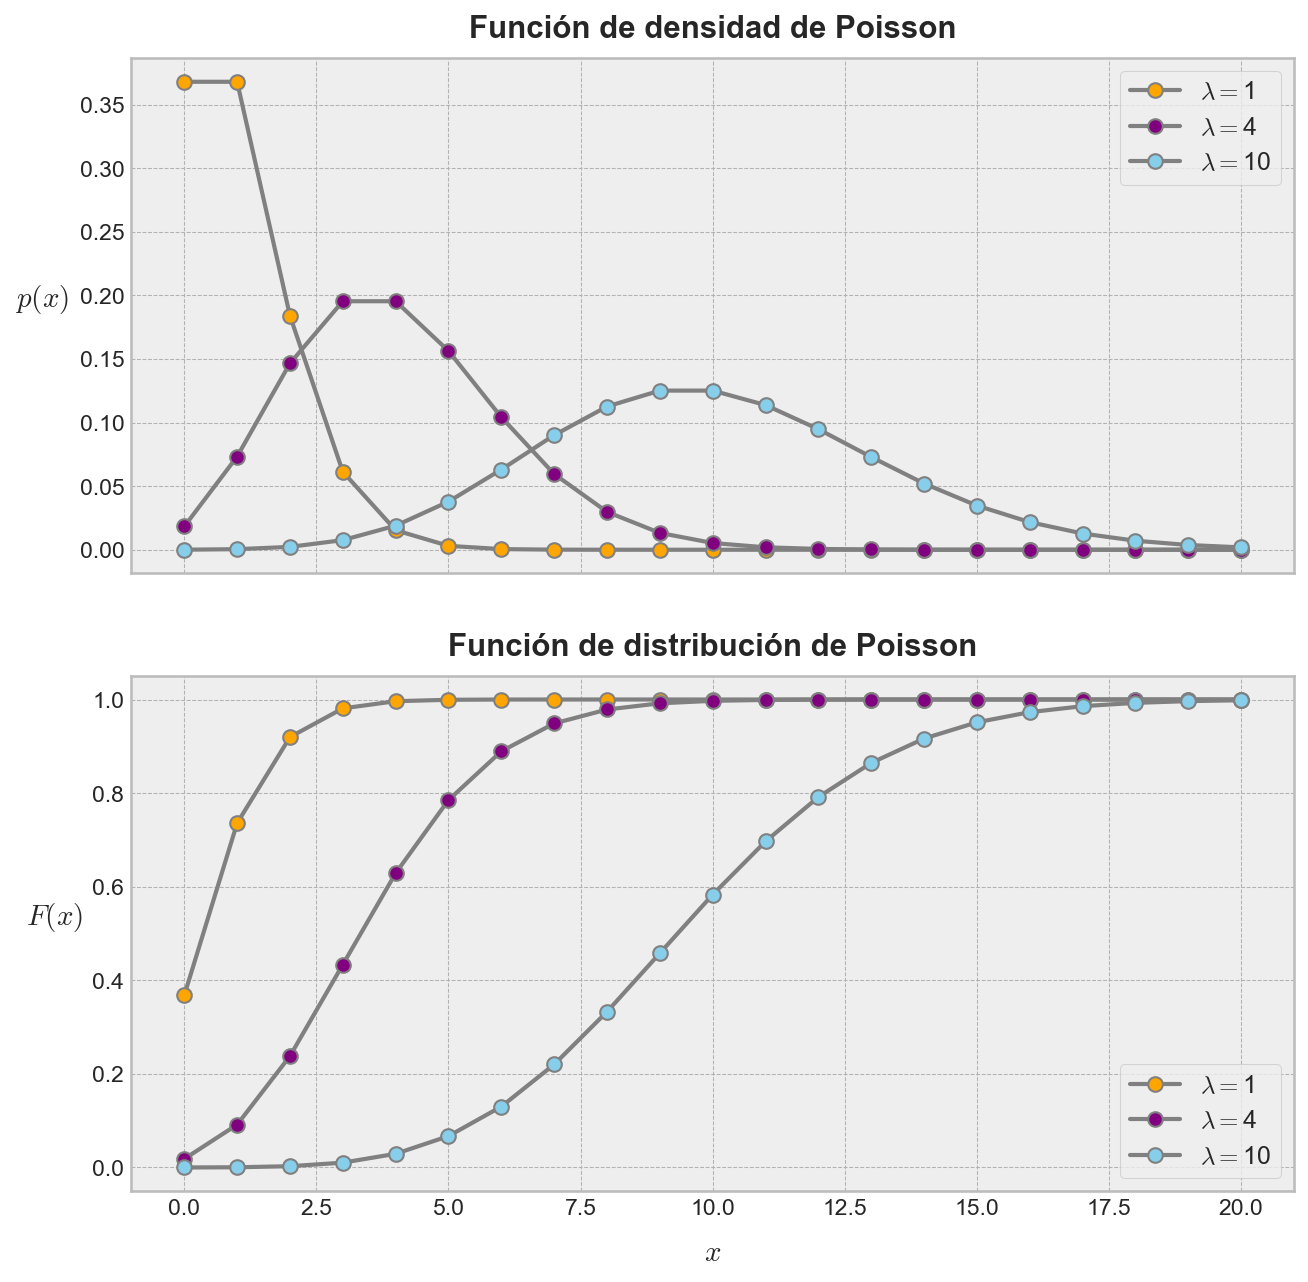

In [17]:
# Generamos un gráfico de una función de densidad de Poisson para varios valores del parámetro.
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=True)
x = np.linspace(start=0, stop=20, num=21)

for lambda_j, color_j in zip([1, 4, 10], ["orange", "purple", "skyblue"]):
    X_j = stats.poisson(lambda_j)
    ax[0].plot(
        x, X_j.pmf(x), marker="o", color="gray", 
        markerfacecolor=color_j, ms=7, label=r"$\lambda=$"+f"{lambda_j}"
    )
    ax[0].legend(loc="best", frameon=True, fontsize=12)
    ax[0].set_ylabel(r"$p(x)$", fontsize=14, labelpad=18, rotation=0)
    ax[1].plot(
        x, X_j.cdf(x), marker="o", color="gray", 
        markerfacecolor=color_j, ms=7, label=r"$\lambda=$"+f"{lambda_j}"
    )
    ax[1].legend(loc="best", frameon=True, fontsize=12)
    ax[1].set_ylabel(r"$F(x)$", fontsize=14, labelpad=18, rotation=0)

ax[0].set_title("Función de densidad de Poisson", pad=10, fontweight="bold", fontsize=15)
ax[1].set_title("Función de distribución de Poisson", pad=10, fontweight="bold", fontsize=15)
ax[1].set_xlabel(r"$x$", fontsize=14, labelpad=10);

◼︎

En los ejemplos anteriores, hemos construido variables aleatorias instanciando un objeto por medio de la clase correspondiente, y hemos calculado varios estadígrafos y elementos derivados de estas variables. Sin embargo, podemos calcular estos mismos elementos sin instanciar una variable a partir de estas clases. Por ejemplo, podemos obtener los valores de la distribución de Poisson con $\lambda=8$ simplemente partiendo desde ese valor:

In [18]:
# Distribución de Poisson de parámetro 8.
X_cdf = stats.poisson(8).cdf(x)

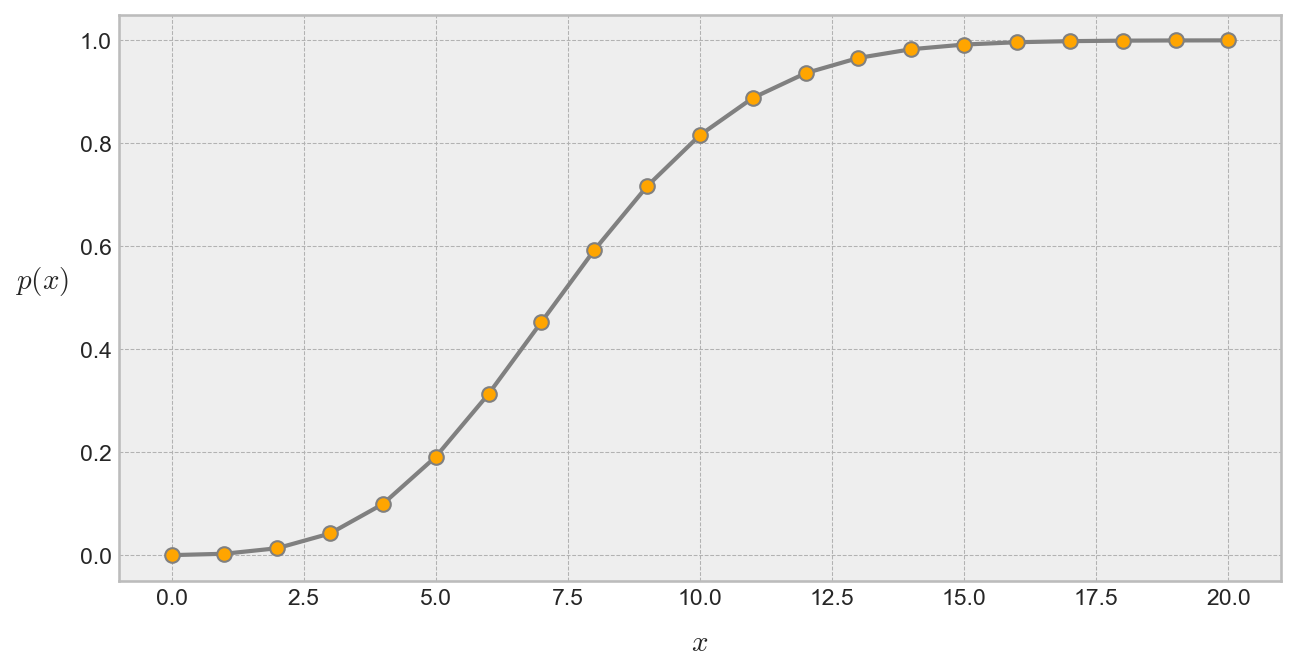

In [19]:
# Graficamos esta función.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, X_cdf, marker="o", color="gray", markerfacecolor="orange", ms=7)
ax.set_xlabel(r"$x$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$p(x)$", fontsize=14, labelpad=18, rotation=0);

Hasta ahora, simplemente hemos revisado propiedades inherentes a las variables aleatorias creadas y sus distribuciones. Notemos que, aunque una función de distribución permite describir una variable aleatoria, la distribución como tal es completamente determinista. Para muestrear números aleatorios que están distribuidos de acuerdo a una determinada función de distribución de probabilidad, podemos usar el método `rvs()` (que hace referencia a *random variable sampling*). Este método requiere un único parámetro obligatorio que corresponde al tamaño de la muestra. En este caso, la muestra puede corresponder una única variable aleatoria (en cuyo caso, imputamos un único número entero), o bien, un arreglo de varios números enteros que representan las dimensiones de varias muestras:

In [20]:
# Extraeremos un total de 100 muestras de una distribución normal de media 0 y desviación
# estándar igual a 1.
X = stats.norm(loc=0, scale=1)
X_samp = X.rvs(size=100)

La muestra, al observar su distribución de frecuencias en un histograma, es claramente *parecida* a una distribución normal (porque, obviamente... ¡de ahí fue que la muestreamos!):

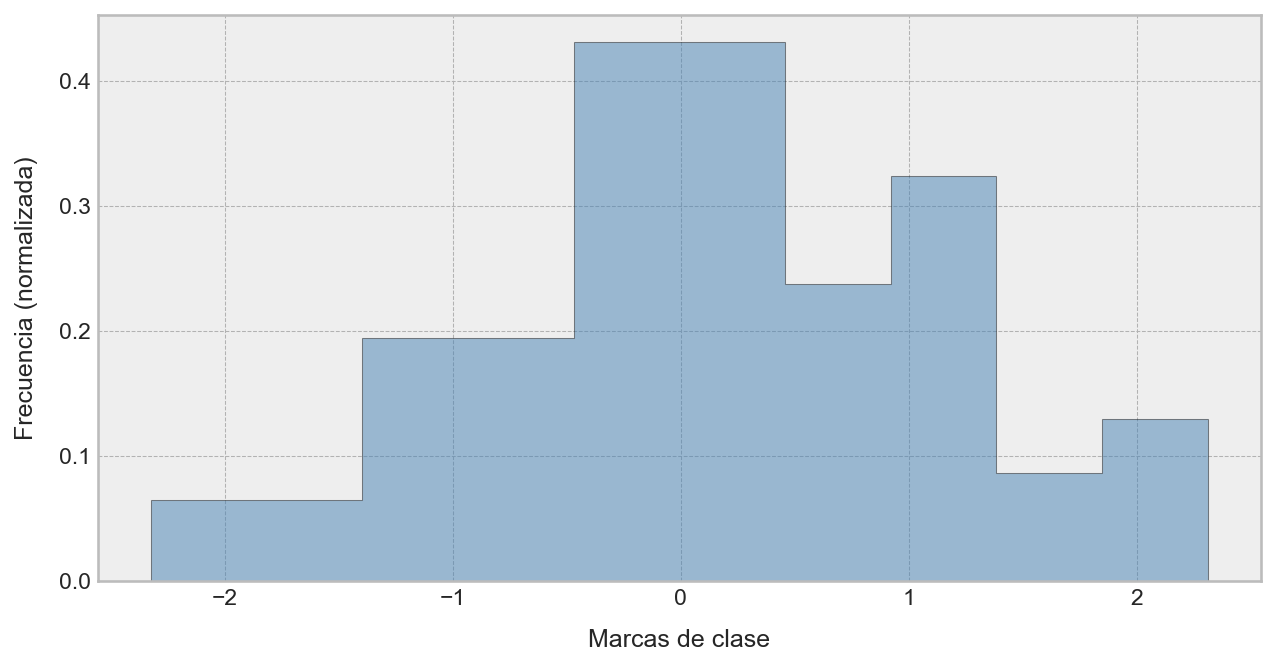

In [21]:
# Histograma para nuestra muestra.
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(x=X_samp, bins=10, color="steelblue", histtype="stepfilled", ec="k", density=True, alpha=0.5)
ax.set_xlabel("Marcas de clase", labelpad=10, fontsize=12)
ax.set_ylabel("Frecuencia (normalizada)", labelpad=10, fontsize=12);

Por supuesto, si queremos observar que efectivamente las muestras que obtenemos a partir de una determinada distribución efectivamente se corresponden con tales distribuciones, bastará con extraer una muestra lo *suficientemente* grande y graficar los respectivos histogramas, comparándolos con las correspondientes funciones de densidad. Ejemplificaremos este caso con tres funciones de densidad bien conocidas en la práctica:

- **$t$ de Student:** $f\left( x,\nu \right)  =\displaystyle \frac{\Gamma \left( \frac{\nu +1}{2} \right)  }{\sqrt{\pi } \Gamma \left( \frac{\nu }{2} \right)  } \left( 1+\frac{x^{2}}{\nu } \right)^{-\frac{\nu +1}{2} }$, donde $x\in \mathbb{R}$ y $\nu>0$ es un parámetro denominado grados de libertad de la distribución y $\Gamma$ es la función gamma.
- **Chi-cuadrado ($\chi^{2}$):** $f\left( x,k\right)  =\displaystyle \frac{1}{2^{\frac{k}{2} }\Gamma \left( \frac{k}{2} \right)  } x^{\frac{k}{2} -1}\exp \left( -\frac{x}{2} \right)$, donde $x>0$ y $k>0$ es un parámetro denominado grados de libertad de la distribución.
- **Exponencial:** $f\left( x,\lambda \right)  =\begin{cases}\lambda \exp \left( -\lambda x\right)  &;\  \mathrm{s} \mathrm{i} \  x\geq 0\\ 0&;\  \mathrm{s} \mathrm{i} \  x<0\end{cases} $, donde $\lambda>0$ es un parámetro denominado tasa de crecimiento (o decrecimiento) de la distribución.

Estas tres distribuciones pueden instanciarse mediante las clases `stats.t()`, `stats.chi2()` y `stats.expon()`:

In [22]:
# Instanciamos variables aleatorias con las distribuciones anteriores.
X = stats.t(df=8) # df es un parámetro que establece los grados de libertad.
Y = stats.chi2(df=5) # df es un parámetro que establece los grados de libertad.
Z = stats.expon(0.5)

Con los objetos anteriores instanciados, extraemos 2000 muestras de cada distribución y comparamos gráficamente la densidad observada versus la teórica:

In [23]:
# Extraemos 2000 muestras de estas distribuciones.
X_samp = X.rvs(size=2000)
Y_samp = Y.rvs(size=2000)
Z_samp = Z.rvs(size=2000)

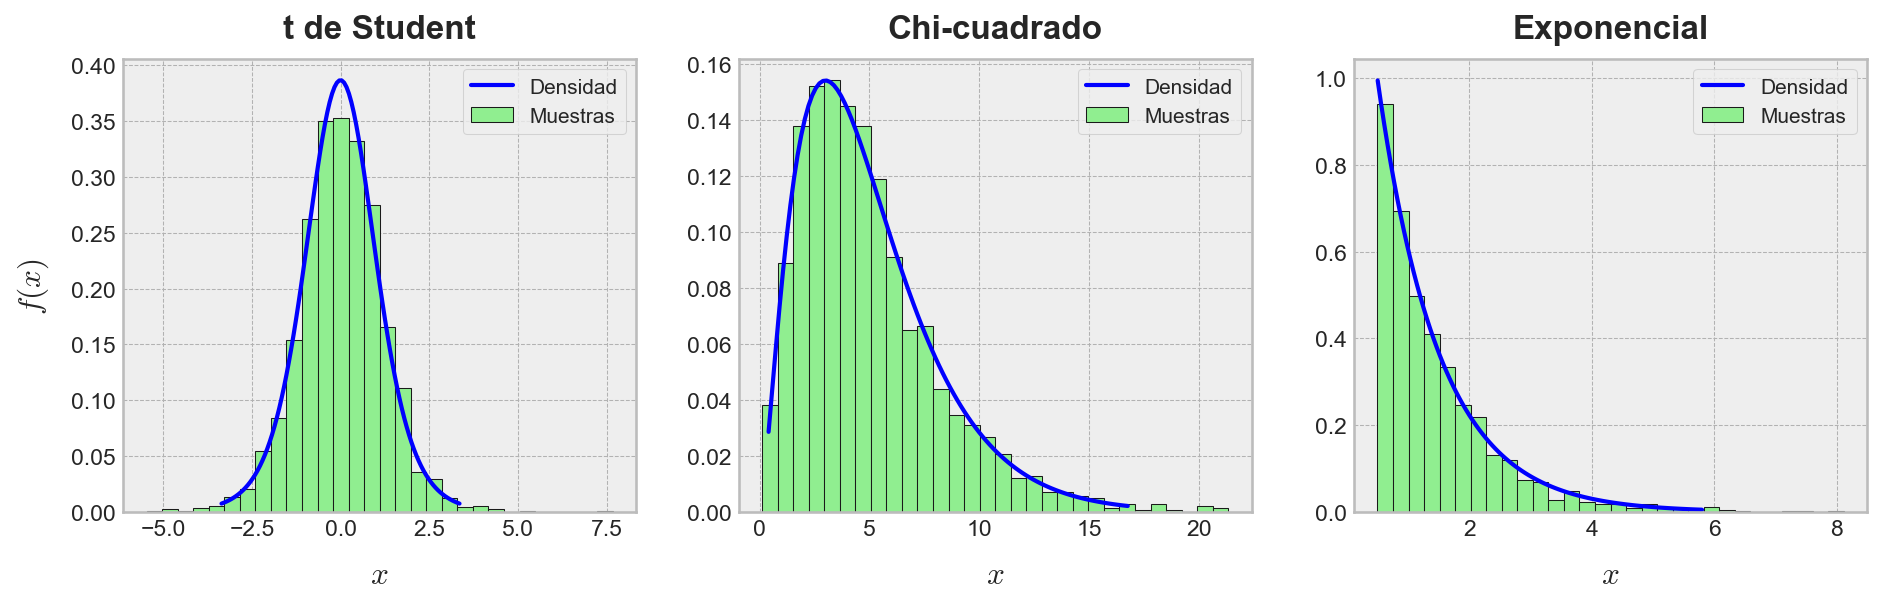

In [24]:
# Graficamos y comparamos.
fig, ax = plt.subplots(figsize=(15, 4), ncols=3, nrows=1)

x = np.linspace(*X.interval(0.99), num=100)
ax[0].plot(x, X.pdf(x), label="Densidad", color="blue", lw=2)
ax[0].hist(x=X_samp, bins=30, color="lightgreen", ec="k", density=True, label="Muestras")
ax[0].legend(loc="best", frameon=True, fontsize=10)
ax[0].set_xlabel(r"$x$", fontsize=15, labelpad=10)
ax[0].set_ylabel(r"$f(x)$", fontsize=15, labelpad=10)
ax[0].set_title("t de Student", fontsize=16, fontweight="bold", pad=10)

y = np.linspace(*Y.interval(0.99), num=100)
ax[1].plot(y, Y.pdf(y), label="Densidad", color="blue", lw=2)
ax[1].hist(x=Y_samp, bins=30, color="lightgreen", ec="k", density=True, label="Muestras")
ax[1].legend(loc="best", frameon=True, fontsize=10)
ax[1].set_xlabel(r"$x$", fontsize=15, labelpad=10)
ax[1].set_title("Chi-cuadrado", fontsize=16, fontweight="bold", pad=10)

z = np.linspace(*Z.interval(0.99), num=100)
ax[2].plot(z, Z.pdf(z), label="Densidad", color="blue", lw=2)
ax[2].hist(x=Z_samp, bins=30, color="lightgreen", ec="k", density=True, label="Muestras")
ax[2].legend(loc="best", frameon=True, fontsize=10)
ax[2].set_xlabel(r"$x$", fontsize=15, labelpad=10)
ax[2].set_title("Exponencial", fontsize=16, fontweight="bold", pad=10);

Y vemos que, efectivamente, estos conjuntos de datos muestreados desde estas tres distribuciones sí se aproximan bien a sus contrapartes teóricas para una suficiente cantidad de muestras.

La situación opuesta a la extracción de muestras a partir de una distribución conocida corresponde al ajuste de una distribución de probabilidad dada, de parámetros desconocidos, a un conjunto de datos. En un proceso de ajuste como éste, en general, queremos optimizar esos parámetros desconocidos de manera tal que la versomilitud inherente a esta data se maximice. Este procedimiento se conoce como ajuste de máxima verosimilitud, y es que el módulo `scipy.stats` utiliza para generar ajustes de conjuntos de datos a determinadas distribuciones por medio del método `fit()`.

Por ejemplo, consideremos la extracción de 300 muestras aleatorias de una distribución Gamma, cuya función de densidad de parámetro $a>0$ se define como

$$f\left(x,a\right)=\displaystyle \frac{x^{a-1}\exp \left( -x\right)}{\Gamma \left(a\right)}$$
</p> <p style="text-align: right;">$(1.3)$</p>

donde $x\geq 0$. Podemos construir una variable aleatoria de tipo Gamma mediante la clase `scipy.stats.gamma()`, usando además el parámetro `a`. En nuestro caso, usaremos `a=6`. Una vez que extraigamos la muestra, construiremos un ajuste mediante el método `fit()` y compararemos los resultados entre las funciones de densidad original y recuperada por medio de este ajuste:

In [25]:
# Partimos definiendo una variable aleatoria tipo Gamma.
X = stats.gamma(a=6)

In [26]:
# Extraemos una muestra de 300 realizaciones de esta variable.
X_samp = X.rvs(size=300)

In [27]:
# Generamos el ajuste.
a, loc, scale = stats.gamma.fit(X_samp)

In [28]:
# Verificamos los parámetros que hemos obtenido por medio del ajuste.
print(f"Parámetro a = {a}")
print(f"Parámetro de localización = {loc}")
print(f"Parámetro de escala = {scale}")

Parámetro a = 5.291930293145382
Parámetro de localización = 0.15067561171286523
Parámetro de escala = 1.0785227623901572


Vemos pues que el ajuste ha logrado estimar que el parámetro $a$ es igual a $5.291930293145382$. Originalmente es igual a 5. Los parámetros que son propios de una distribución, como $a$ en el caso de la distribución Gamma, $\nu$ en el caso de la distribución t de Student, y otros más propios de cada una, son comúnmente denominados **parámetros de forma**, ya que controlan la geometría intrínseca a cada una de las correspondientes funciones de densidad. Sin embargo, también existen otros parámetros que controlan la posición relativa de las distribuciones con respecto a la media (localización) y su dispersión (escala). Por esa razón, un ajuste típico en `scipy.stats` devolverá estos tres parámetros.

Comparemos gráficamente ambas funciones de densidad:

In [29]:
# Instanciamos una variable aleatoria con los parámetros encontrados mediante el ajuste.
X_fit = stats.gamma(a, loc, scale)

In [30]:
# Obtenemos las funciones de densidad y distribución para ambas variables aleatorias.
x = np.linspace(*X.interval(0.99), num=100)
X_pdf, X_cdf = X.pdf(x), X.cdf(x)
X_fit_pdf, X_fit_cdf = X_fit.pdf(x), X_fit.cdf(x)

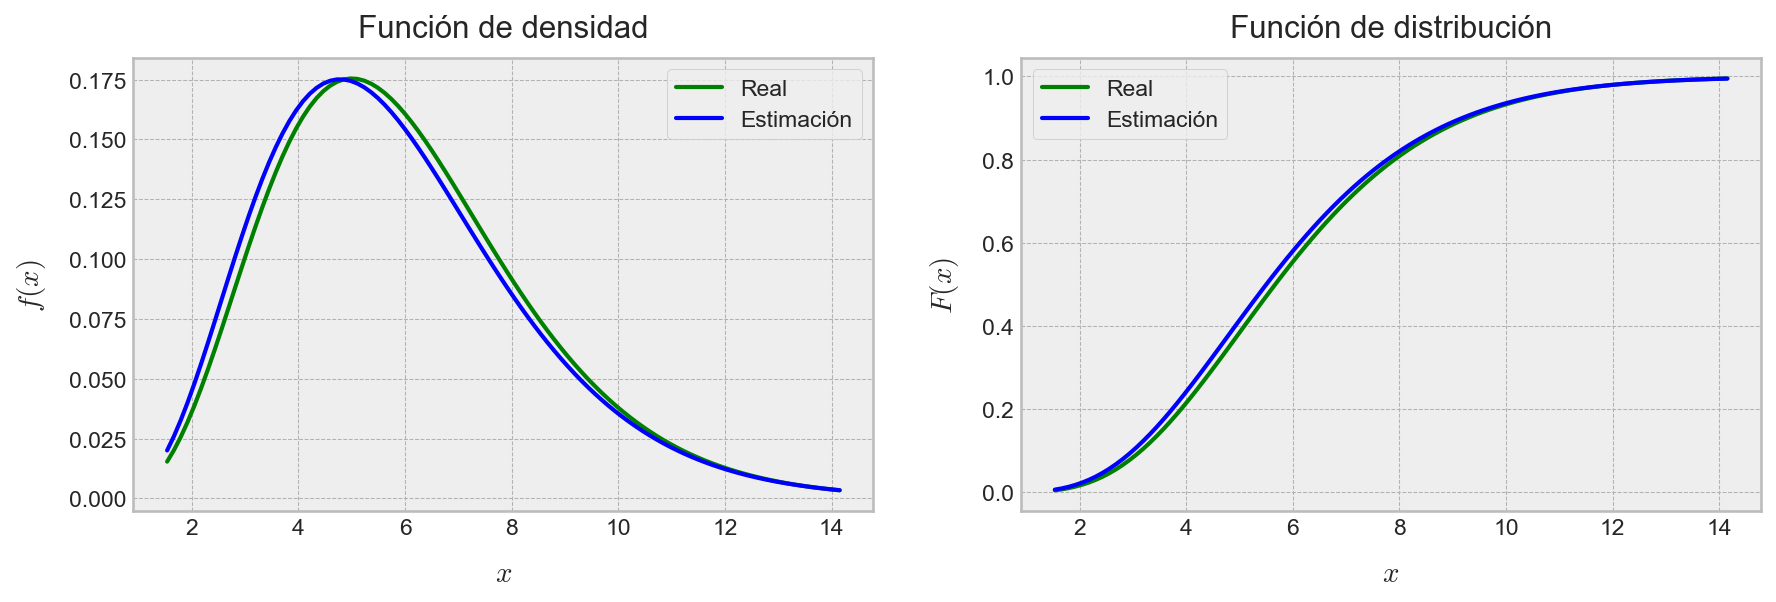

In [31]:
# Comparativa entre funciones de densidad.
fig, ax = plt.subplots(figsize=(14, 4), ncols=2)

ax[0].plot(x, X_pdf, color="green", label="Real")
ax[0].plot(x, X_fit_pdf, color="blue", label="Estimación")
ax[0].legend(loc="best", frameon=True)
ax[0].set_xlabel(r"$x$", fontsize=14, labelpad=10)
ax[0].set_ylabel(r"$f(x)$", fontsize=14, labelpad=10)
ax[0].set_title("Función de densidad", fontsize=15, pad=10)

ax[1].plot(x, X_cdf, color="green", label="Real")
ax[1].plot(x, X_fit_cdf, color="blue", label="Estimación")
ax[1].legend(loc="best", frameon=True)
ax[1].set_xlabel(r"$x$", fontsize=14, labelpad=10)
ax[1].set_ylabel(r"$F(x)$", fontsize=14, labelpad=10)
ax[1].set_title("Función de distribución", fontsize=15, pad=10);

Vemos que hemos logrado un ajuste bastante decente. Aunque por supuesto, el ejercicio anterior es de carácter meramente explicativo. En el mundo real, ajustar una distribución a un conjunto de datos previamente procesado requiere tomar la decisión relativa a la distribución que tomaremos como referencia del ajuste. Esa decisión no suele ser sencilla, y por esa razón, existen **pruebas de bondad del ajuste**, con sus correspondientes métricas de error y potencia, que permiten rankear resultados relativos a cada uno de los procedimientos de ajuste.

### Pruebas de hipótesis.
